In [ ]:
! pip install facenet-pytorch==2.5.2
! pip install --upgrade gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6


In [ ]:
import torch
import facenet_pytorch
import yaml
from PIL import Image
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
import numpy as np
from PIL import Image, ImageDraw
from IPython import display
import matplotlib.pyplot as plt
from torchvision import transforms

# Детекция Лица

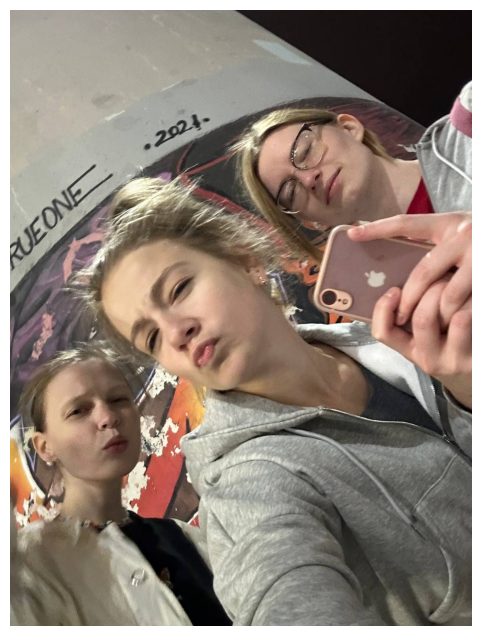

NameError: ignored

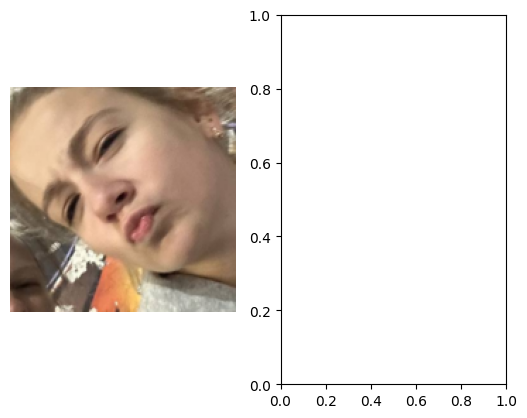

In [66]:
# # Создаем экземпляр MTCNN
mtcnn = MTCNN(margin=20, thresholds=[0.6, 0.6, 0.6], keep_all=True, post_process=False, device='cpu')
# mtcnn = MTCNN(
#     image_size=160, margin=0, keep_all=True,
#      factor=0.709, post_process=False,
#     device='cpu'
# )

# # Загрузка изображения
image = Image.open('/content/faces.jpg')
# image = plt.imread('/content/faces.jpg')
# print(image.shape)

# Обнаружение лиц
faces = mtcnn(image)



# Вывод изображения с лицами
plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.show()

# Вывод найденных лиц
# Вывод найденных лиц
# if len(faces) > 1:
#     fig, axes = plt.subplots(1, len(faces))
#     for face, ax in zip(faces, axes):

#         print(face.dim())  # Добавьте эту строку
#         if face.dim() == 3:  # И эту строку
#             ax.imshow(face.permute(1, 2, 0).int().numpy())
#         elif face.dim() == 2:  # И эту строку
#             ax.imshow(face.int().numpy(), cmap='gray')  # И эту строку
#         ax.axis('off')
# else:
#     fig, ax = plt.subplots(1, 1)
#     print(faces[0].dim())  # Добавьте эту строку
#     if faces[0].dim() == 3:  # И эту строку
#         ax.imshow(faces[0].permute(1, 2, 0).int().numpy())
#     elif faces[0].dim() == 2:  # И эту строку
#         ax.imshow(faces[0].int().numpy(), cmap='gray')  # И эту строку
#     ax.axis('off')
# fig.show()

if len(faces) > 1:
    fig, axes = plt.subplots(1, len(faces))
    for face, ax in zip(faces, axes):
        t = face
        ax.imshow(face.permute(1, 2, 0).int().numpy())
        ax.axis('off')
        brake
else:
    fig, ax = plt.subplots(1, 1)
    ax.imshow(faces[0].permute(1, 2, 0).int().numpy())
    ax.axis('off')
fig.show()

# Вывод количества найденных лиц
print(f"Найдено лиц: {len(faces)}")


In [68]:
t.shape

torch.Size([3, 160, 160])

In [ ]:
# from PIL import Image
# import matplotlib.pyplot as plt
# from facenet_pytorch import MTCNN, extract_face

# # Создаем экземпляр MTCNN
# mtcnn = MTCNN(keep_all=True, device='cpu')

# # Загрузка изображения
# image = Image.open('/content/face.jpg')

# # Обнаружение лиц и их особенностей
# boxes, probs, landmarks = mtcnn.detect(image, landmarks=True)

# # Проверяем, найдены ли какие-либо лица
# if boxes is not None:
#     # Проходим через каждое найденное лицо
#     for i in range(len(boxes)):
#         # Получаем особенности лица (точки глаз, носа и рта)
#         landmark = landmarks[i]

#         # Вычисляем центр между двуми глазами
#         eyes_center = ((landmark[0][0]+landmark[1][0])*0.5, (landmark[0][1]+landmark[1][1])*0.5)

#         # Вычисляем угол между глазами
#         dx = landmark[1][0] - landmark[0][0]
#         dy = landmark[1][1] - landmark[0][1]
#         angle = np.arctan(dy/dx) * 180. / np.pi

#         # Извлекаем и поворачиваем лицо
#         box = boxes[i]
#         face_tensor = extract_face(image, box, image_size=160, margin=0, save_path=None)

#         # Преобразуем тензор обратно в изображение PIL и поворачиваем его
#         face_pil = transforms.ToPILImage()(face_tensor)
#         face_pil = face_pil.rotate(-angle)

#         # Выводим повернутое лицо
#         plt.imshow(face_pil)
#         plt.axis('off')
#         plt.show()


In [82]:
anti_spoofing_data = np.load('anti_spoofing_data.npz')
X, y = anti_spoofing_data['arr_0'], anti_spoofing_data['arr_1']
temp = set(y)
check_live_label = 0
check_spoof_label = 0
for i in y:
    if i == 1:
        check_live_label += 1
    elif i == 0:
        check_spoof_label += 1
print(f"There are 2 classes including number of live is {check_live_label} and number of spoof is {check_spoof_label}")

FileNotFoundError: ignored

Подключения модели

In [ ]:
!git clone https://github.com/minivision-ai/Silent-Face-Anti-Spoofing

Cloning into 'Silent-Face-Anti-Spoofing'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 376 (delta 84), reused 78 (delta 78), pack-reused 274
Receiving objects: 100% (376/376), 26.04 MiB | 31.33 MiB/s, done.
Resolving deltas: 100% (167/167), done.


In [ ]:
import torch
from torch import nn
from torchvision.models import resnet50
from facenet_pytorch import MTCNN, InceptionResnetV1

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


class CustomModel(nn.Module):
    def __init__(self):
        super(CustomModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.dense = nn.Linear(128*8*8, 512, bias=False)
        self.bn3 = nn.BatchNorm1d(512)
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(512+512, 2)

    def forward(self, x, mtcnn, resnet):
        x = x.to(device)

#         print(x.shape)

        # First input
        x1 = self.pool1(F.relu(self.bn1(self.conv1(x))))
        x1 = self.pool2(F.relu(self.bn2(self.conv2(x1))))
        x1 = x1.view(x.size(0), -1)
        x1 = self.dropout(self.bn3(self.dense(x1)))

#         print(x1.shape)

        # Second input
        x2_list = torch.zeros((x.size(0), 512)).to(device)
        for i in range(x.size(0)):
            img = x[i].permute(1, 2, 0).cpu()  # Перемещение изображения на CPU
            detected_faces = mtcnn(img)
            if detected_faces is not None:
                detected_faces = detected_faces.unsqueeze(0).to(device) # add batch dimension
                resnet.eval()
                detected_faces = resnet(detected_faces)
            else:
                detected_faces = torch.zeros((1, 512)).to(device) # assuming the output of resnet is of shape (batch_size, 512)
            x2_list[i] = detected_faces

#         print(x2_list.shape)
        # Merge
        x = torch.cat((x1, x2_list), dim=1)

        # Classification
        x = self.fc(x)

        return x



# # Обучение модели
# model = model.to(device)



cpu


In [ ]:
model = CustomModel()
model.to(device)
o=0

In [ ]:
train_idx, val_idx = train_test_split(range(len(tmp)), test_size=0.1, random_state=42)

train_dataset = Subset(tmp, train_idx)
val_dataset = Subset(tmp, val_idx)

NameError: ignored

In [ ]:
# train_data_loader = torch.utils.data.DataLoader(
#     train_dataset,
#     batch_size=64,
#     num_workers=1
# )

# valid_data_loader = torch.utils.data.DataLoader(
#     val_dataset,
#     batch_size=64,
#     num_workers=1
# )


mtcnn_model = MTCNN().eval().cpu()  # MTCNN на CPU
resnet_model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from tqdm import tqdm
from sklearn.metrics import f1_score

# Определение устройства
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Функция обучения
def train(model, dataloader, criterion, optimizer, device):
    model.train()
    for images, labels in tqdm(dataloader):
        images = images.to(device).float()
        labels = labels.to(device).long()
        optimizer.zero_grad()
        outputs = model(images, mtcnn_model, resnet_model)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

# Обучение модели
model = model.to(device)
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Функция валидации
def validate(model, dataloader, criterion, device):
    model.eval()
    val_loss = 0
    correct = 0
    all_labels = []
    all_predictions = []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device).float()
            labels = labels.to(device).long()
            outputs = model(images, mtcnn_model, resnet_model)
            val_loss += criterion(outputs, labels).item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()

            # Сохраняем метки и прогнозы для вычисления F1-оценки
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    val_loss /= len(dataloader.dataset)
    val_accuracy = 100. * correct / len(dataloader.dataset)

    # Вычисляем F1-оценку
    f1 = f1_score(all_labels, all_predictions, average='weighted')

    return val_loss, val_accuracy, f1

# Обучение и валидация модели
for epoch in range(1):  # 10 эпох для примера
    train(model, train_data_loader, criterion, optimizer, device)
    val_loss, val_accuracy, f1 = validate(model, valid_data_loader, criterion, device)
    torch.save(model.state_dict(), f'model_epoch_{epoch}.pth')
    print(f'Epoch: {epoch}, Val Loss: {val_loss}, Val Accuracy: {val_accuracy}, F1 Score: {f1}')


In [ ]:
# torch.save(model.state_dict(), f'model_epoch_10.pth')

model.load_state_dict(torch.load('/content/model_epoch_11.pth', map_location=torch.device('cpu')))

<All keys matched successfully>

In [ ]:
model.eval()

CustomModel(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dense): Linear(in_features=8192, out_features=512, bias=False)
  (bn3): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (fc): Linear(in_features=1024, out_features=2, bias=True)
)

In [74]:
t.shape

torch.Size([3, 160, 160])

In [76]:
import cv2
new_data = plt.imread('/content/faces.jpg')
print(new_data.shape)
new_data = cv2.resize(new_data, (1, 128, 128))

plt.imshow(new_data)
plt.show()

torch.Size([3, 160, 160])


error: ignored

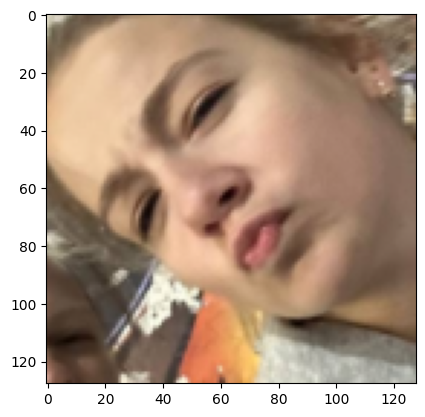

In [78]:
# Предполагая, что 't' - это тензор PyTorch с формой [3, H, W]
new_data = t.unsqueeze(0)  # Добавляем размерность пакета

# Изменение размера тензора
new_data = F.interpolate(new_data, size=(128, 128), mode='bilinear', align_corners=False)

new_data = new_data - new_data.min()
new_data = new_data / new_data.max()

# Удаление размерности пакета и перестановка размерностей для отображения
new_data = new_data.squeeze(0).permute(1, 2, 0)

plt.imshow(new_data)
plt.show()

In [79]:
# # Загрузка новых данных для предсказания
# new_data = plt.imread('/content/faces.jpg')

# Предсказание с помощью модели
with torch.no_grad():
    inputs = torch.tensor(new_data).permute(2, 0, 1).unsqueeze(0).to(device).float()
    print(inputs.shape)
    outputs = model(inputs, mtcnn_model, resnet_model)

# Получение предсказанных меток
t, predicted_labels = torch.max(outputs.data, 1)

torch.Size([1, 3, 128, 128])


<ipython-input-79-70b205c2d8c2>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  inputs = torch.tensor(new_data).permute(2, 0, 1).unsqueeze(0).to(device).float()


In [80]:
predicted_labels

tensor([0])

In [81]:
t

tensor([1.5962])